In [8]:
# allow imports from parent directory
import sys 
sys.path.append("../")

# comment out if not using a dark themed editor
import matplotlib.pyplot as plt
plt.style.use("dark_background")

from src.dataset import _get_filepaths, _load_timeseries, _compute_dynamic_fc
from src.plot import plot_timeseries, plot_dynamic_graph

In [2]:
# get filepaths for Human Connectome Project (HCP) and UK Biobank (UKB) data
hcp_fpaths = _get_filepaths(dataset="hcp", data_dir="../data")
ukb_fpaths = _get_filepaths(dataset="ukb", data_dir="../data")
# check equal number of subjects 
assert len(hcp_fpaths) == len(ukb_fpaths)

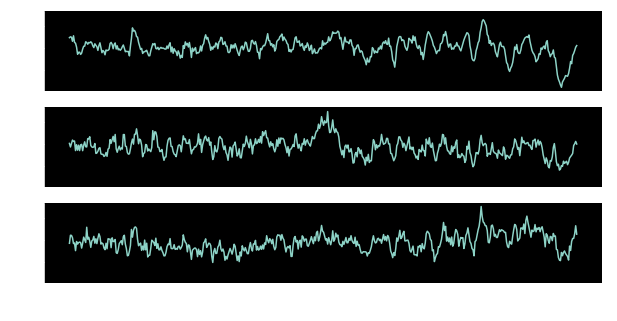

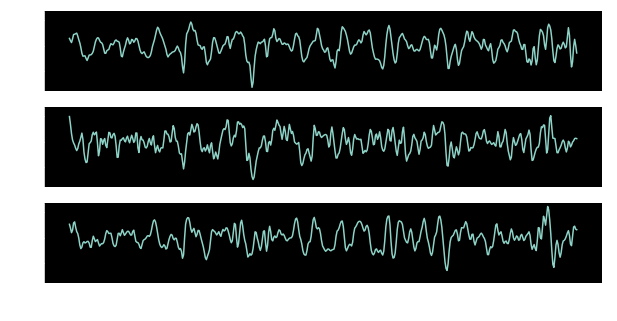

In [3]:
# load a fMRI BOLD timeseries 
X_hcp, _ = _load_timeseries(hcp_fpaths[0], zscore=True)
X_ukb, _ = _load_timeseries(ukb_fpaths[0], zscore=True)
# check equal number of brain regions
assert X_hcp.shape[0] == X_ukb.shape[0]

# plot example BOLD timeseries data
plot_timeseries(X_hcp, num_features=3, time_len=500, figsize=(10, 5))
plot_timeseries(X_ukb, num_features=3, time_len=500, figsize=(10, 5))

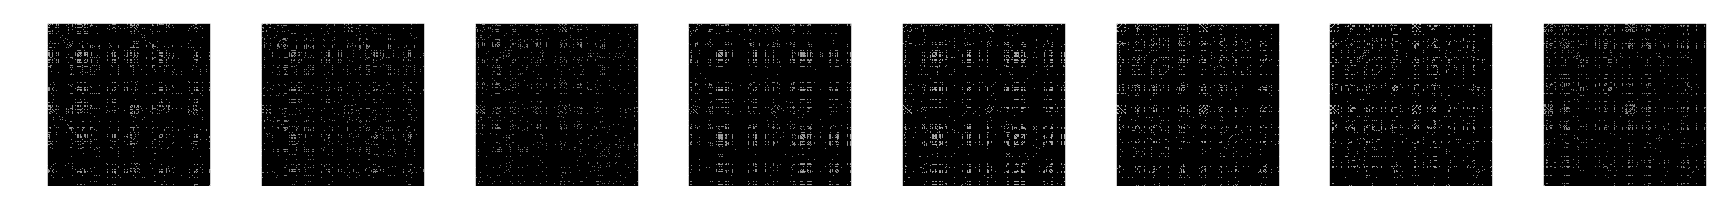

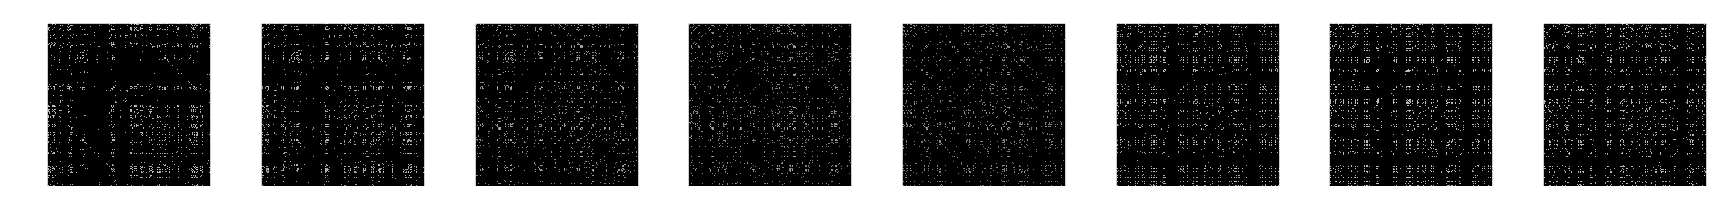

In [4]:
# preprocess BOLD timeseries into dynamic graph
G_hcp = _compute_dynamic_fc(X_hcp)
G_ukb = _compute_dynamic_fc(X_ukb)
# check equal time length
assert len(G_hcp) == len(G_ukb)
# check equal number of nodes
assert G_hcp[0].number_of_nodes() == G_ukb[0].number_of_nodes()
# check equal number of edges
assert G_hcp[0].size() == G_ukb[0].size()

# plot example dynamic graphs
plot_dynamic_graph(G_hcp, time_len=8, figsize=(30, 3))
plot_dynamic_graph(G_ukb, time_len=8, figsize=(30, 3))